<a href="https://colab.research.google.com/github/kishorekubendiran/Data_Preprocessing-Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Networks_Ads.csv

Importing the libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Importing the dataset

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/Yuvaranii/Data_Preprocessing-Machine-Learning/main/Social_Network_Ads.csv")

In [4]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
Data.duplicated().value_counts()

False    400
dtype: int64

In [6]:
Data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Splitting the dataset into the Training set and Test set

In [7]:
Data = Data.drop("User ID", axis = 1)

In [8]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Column = ["Gender"]
Data[Column] = Data[Column].apply(Encoder.fit_transform)

In [10]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [11]:
Data.shape

(400, 4)

In [12]:
X = Data[["Gender", "Age", "EstimatedSalary"]]
Y = Data["Purchased"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

eature Scaling

fit_transform() function only acts on training data, transform() acts on test data, and predict() acts on test data

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting K-NN to the Training set

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
Res = knn.fit(X_train, Y_train)

Predicting the Test set results

In [16]:
Res.predict([[1,20,20000]])

array([1])

In [17]:
Res.score(X_test, Y_test)

0.925

Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[48,  4],
       [ 2, 26]])

Text(33.0, 0.5, 'Truth')

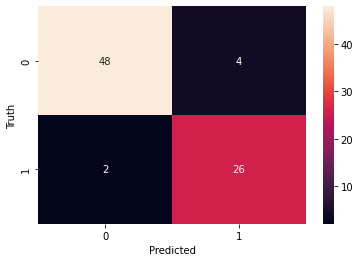

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")